# Colormap Creation

The final time series line plot combined the advantages of the previous attempts. All information was visible at once, presented in a clean and easily interpretable manner. Nevertheless, it introduced a new challenge: Given the close proximity and occasional overlap of lines, conventional color maps were unsuitable. Sequential color maps, previously used for the animated heatmap, were replaced by qualitative color maps. Distinct color maps were extensively tested, aiming for 12 distinct colors, one for each district. However, available options such as "Set1" or "tab10" offered only 9 or 10 colors, respectively. The "Paired" color map in matplotlib provided exactly 12 colors, but it emphasized dark and saturated colors excessively, which did not align with my intentions.

After thorough deliberation, 12 colors were manually selected from https://www.colorhexa.com/web-safe-colors and also from existing colormaps, to create a custom color map.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython import display
import time

print("Set1:")
set1 = sns.color_palette("Set1")
set1

Set1:


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [2]:
print("tab10:")
tab10 = sns.color_palette("tab10")
tab10

tab10:


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
print("Paired:")
Paired = sns.color_palette("Paired")
Paired

Paired:


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [4]:
print("My own palette:")
qualitative_palette = sns.color_palette([set1[0], "#000099", set1[4], "#ff66ff", "#006600", "#ffcc00", "#000000", tab10[9], tab10[5], set1[8], "#00cc00", "#660066"])
qualitative_palette

My own palette:


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.0, 0.0, 0.6),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 0.4, 1.0),
 (0.0, 0.4, 0.0),
 (1.0, 0.8, 0.0),
 (0.0, 0.0, 0.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.6, 0.6, 0.6),
 (0.0, 0.8, 0.0),
 (0.4, 0.0, 0.4)]

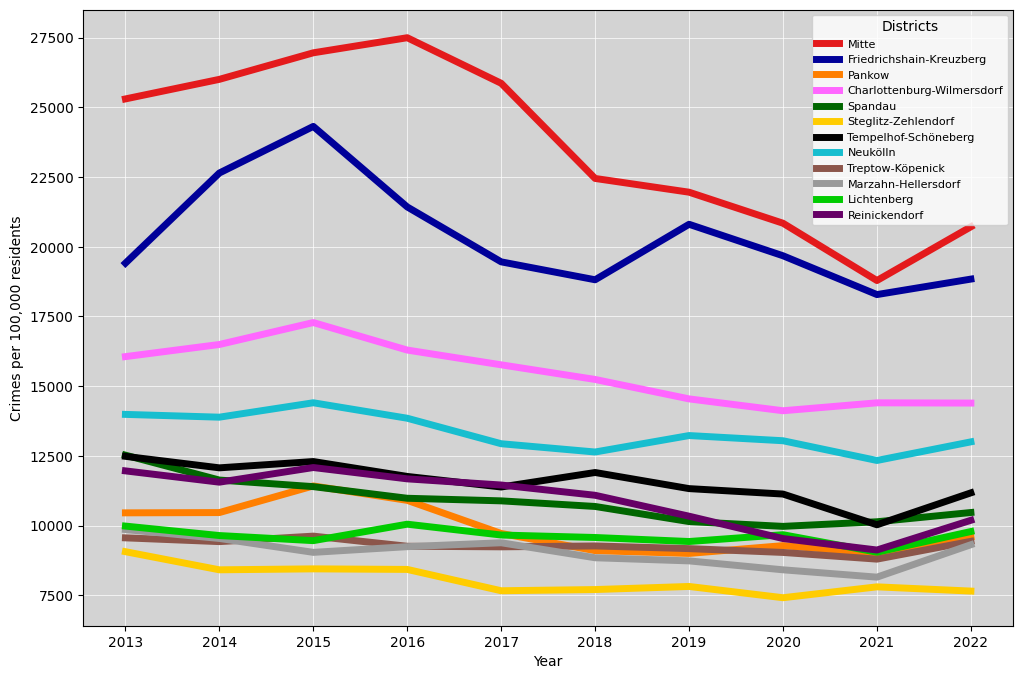

In [5]:
bezirkskriminalitaet = pd.read_pickle("../data/08_kriminalitaet_auf_bezirksebene_2013_bis_2022.pkl")
bezirkskriminalitaet['BEZ'] = bezirkskriminalitaet['LOR-Schlüssel (Bezirksregion)'].astype(str).str[:2]

# Convert "Straftaten \n-insgesamt-" column to integers
bezirkskriminalitaet["Straftaten \n-insgesamt-"] = bezirkskriminalitaet["Straftaten \n-insgesamt-"].astype(int)

# Group the data by "Bezeichnung (Bezirksregion)" and "Year" and sum the "Straftaten \n-insgesamt-" values
grouped_data = bezirkskriminalitaet.groupby(["Bezeichnung (Bezirksregion)", "Year"])["Straftaten \n-insgesamt-"].sum().reset_index()

# Create a categorical color palette with unique colors for each category
categories = bezirkskriminalitaet["Bezeichnung (Bezirksregion)"].unique()
num_categories = len(categories)
#color_palette = sns.color_palette("Paired", num_categories)
#cmap = ListedColormap(color_palette)

# Create the line plot
plt.figure(figsize=(12, 8))

# Iterate over the unique values in the "Bezeichnung (Bezirksregion)" column
for category, color in zip(categories, qualitative_palette):
    # Filter the data for the current category
    category_data = grouped_data[grouped_data["Bezeichnung (Bezirksregion)"] == category]
    
    # Plot the line for the current category
    plt.plot(category_data["Year"], category_data["Straftaten \n-insgesamt-"], label=category, color=color, linewidth=5)

# Set the plot title, labels, and legend
#plt.title("Temporal development (2013-2022) of crime numbers \nper 100,000 residents split by Berlin districts")
plt.xlabel("Year")
plt.ylabel("Crimes per 100,000 residents")
plt.legend(title="Districts", loc="upper right", fontsize=8)

# Get all unique years in the data
unique_years = bezirkskriminalitaet["Year"].unique()

# Set the x-ticks to be all unique years
plt.xticks(unique_years)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain')

# Set the background color to gray
plt.gca().set_facecolor('lightgray')
# Add a grid
plt.grid(color='white', linestyle='-', linewidth=0.5)

#plt.savefig("scatter_plot.svg", bbox_inches="tight", dpi=500)

# Show the plot
plt.show()


```{figure} figures/overall_crimes.png
---
height: 600px
name: fig:crime-dev-curves
---
Temporal development (2013-2022) of crimes per 100,000 residents
per Berlin districts - curves plot with custom colormap
```

Additional design choices were implemented to enhance the final plot:

- To improve the clarity of individual lines, the linewidth was increased to 5.
- The axis ticks and labels were adjusted to ensure that each year is distinctly represented, improving overall legibility.
- The legend was repositioned to the upper-right corner and resized slightly to minimize its impact on line visibility. Furthermore, it was given a partial transparency effect, ensuring that lines remain visible even when overlapping with the legend.
- For aesthetic considerations, the background color was set to light gray, accompanied by the addition of a white grid pattern to enhance overall readability